## COMP 309 - Assignment 3 (Part 4 Model Fitting, MARK I)

### Step 1: acquire training and test set

**import dependencies:**

In [1]:
# import dependencies:
import pandas as pd
import numpy as np

**acquire train-test sets:**

In [2]:
# acquire training set:
train_set=pd.read_csv('processed_train_set.csv')

# acquire test set:
test_set=pd.read_csv('processed_test_set.csv')

In [3]:
# display dimensions of training set:
print('training set:')
print('# of instances:', train_set.shape[0], '# of features:', train_set.shape[1])

# display dimensions of test set:
print('\ntest set:')
print('# of instances:', test_set.shape[0], '# of features:', test_set.shape[1])

training set:
# of instances: 50000 # of features: 15

test set:
# of instances: 30931 # of features: 14


**acquire X_train, y_train:** 

In [4]:
# transform the dataset into something the classifier likes:
X_train=train_set.drop('genre', axis=1)
y_train=train_set['genre']
X_test=test_set

In [5]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (50000, 14)
y_train shape: (50000,)


**acquire X_test:** 

In [6]:
X_test=test_set

In [7]:
print('X_test shape:', X_test.shape)
print('Predictions:     ???')

X_test shape: (30931, 14)
Predictions:     ???


### Step 2: Compare performance of different machine-learning models

  0%|          | 0/5 [00:00<?, ?it/s]

LR: 0.549780 (0.007691)
LDA: 0.536100 (0.007851)
KNN: 0.526020 (0.006586)
RF: 0.604420 (0.005925)
NB: 0.528980 (0.006234)


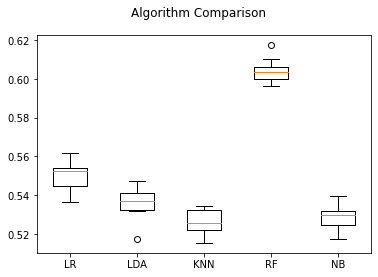

In [8]:
# for progress bar:
from tqdm.notebook import tqdm

# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC

# prepare models:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('XG', GradientBoostingClassifier()))
#models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in tqdm(models):
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

From the results reported above it appears the best performing model for this dataset is the RandomForestClassifier. We will use this classifier to produce our list of predictions for submission.

### Step 3: Voting ensemble models, performance improvement ?

### Step 4: Best model, XGBoost ?

### Step 5: Best model, XGBoost ?

**implementing**:
1. early-stopping 
2. learning-rate and number of trees hyperparameter-tuning

### SCRAP WORK:

In [9]:
# train selected model:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier=DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# generate predictions
predictions=decision_tree_classifier.predict(X_test)
predictions

array(['Alternative', 'Alternative', "Children's Music", ...,
       'Alternative', "Children's Music", "Children's Music"],
      dtype=object)

In [11]:
# generate ids:
test_spare=pd.read_csv('test_spare.csv')
instance_ids=test_spare['instance_id']
instance_ids=list(instance_ids)

In [12]:
# display final results in tabular format:
list_zip = zip(instance_ids, predictions)
final_results = pd.DataFrame(list_zip)
final_results.columns = ['instance_id', 'genre']
final_results

instance_id             genre
0                1       Alternative
1                2       Alternative
2                3  Children's Music
3                4       Alternative
4                5  Children's Music
...            ...               ...
30926        30927       Alternative
30927        30928  Children's Music
30928        30929       Alternative
30929        30930  Children's Music
30930        30931  Children's Music

[30931 rows x 2 columns]

**Convert final results to csv for final submission:**

In [13]:
final_results.to_csv('final_results_III.csv', index=False)